# Viral Propagation in Population

We want to see the difference between a population of party-goers (aka normal deer) and those that do social distancing. 

Changes in this model, compared to the previous model:
Delete:
* No food, because its not relevant 
* No hunger
* No new babies (it's not about that anymore) 
* Essentially stable population that doesn't change

Add: 
* Vector of who is healthy and who is not 
* Start with patient 0 
* Infection based on minimal distance which means that we'll need to calculate person to person distances and have a piece of code similar to current cabbage, except it will be about infecting others. 
```
for every person:
    if infected:
        calculate distances to every other person 
        find all other people that are closer than the threshold
        infect them!     
```
* Output: new cases per tick as a function of time 
* Running the visualization: infected are red
* Parameter to model social distancing (something that turns them solitary if 0, or super mixing together if 1): let's make them wiggle (vx = np.random.rnorm(...) *speed ), and lets change the speed 

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [50]:
##### Define constants, but we do it as a class (to later make passing it around easier)

class Const: #Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals = 1000  #Original n_animals
        self.n_steps = 500
        self.vmin = 0.01
        self.vmax = 5*self.vmin
        self.speed = 0.07
        self.arena_size = 3       
        
        self.contagion_distance = 0.1**2 #Distance squared to avoid sqrt later 

In [51]:
#Build the model

def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals)
        vy = np.zeros(c.n_animals)
        infected = np.zeros(c.n_animals)
        infected[0] = 1 #Patient zero    
        
        stats = np.zeros(c.n_steps) #What is reported for every trial 
    
        if show_dotses: #Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) #No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_animals)*c.vmin 
            vy = np.random.randn(c.n_animals)*c.vmin 
            #Make them run around (keeps speed somewhat randomized)

            #Reflect from the walls
            #vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            #vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) #Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals):
                if infected [i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance) #List of all animals that are doomed 
                    infected[victims]=1
                               
            stats[t] = np.sum(infected)
                    
            if show_dotses: #Actual animation
                ax.clear()
                plt.plot(x[infected == 0], y[infected == 0], 'k.',markersize=5);
                plt.plot(x[infected == 1], y[infected == 1], 'r.',markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() #Redraws the canvas (key secret command to animate things)
            else:
                print('.',end='')
        #Time loop is over

        history[:,i_trial] = c.n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


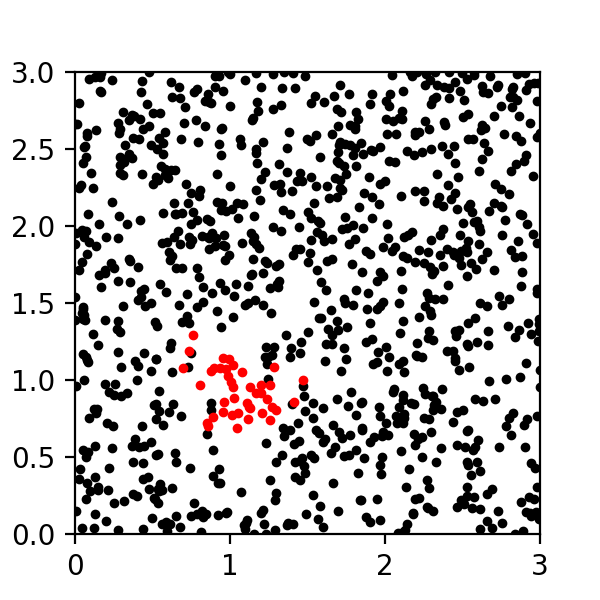

<IPython.core.display.Javascript object>


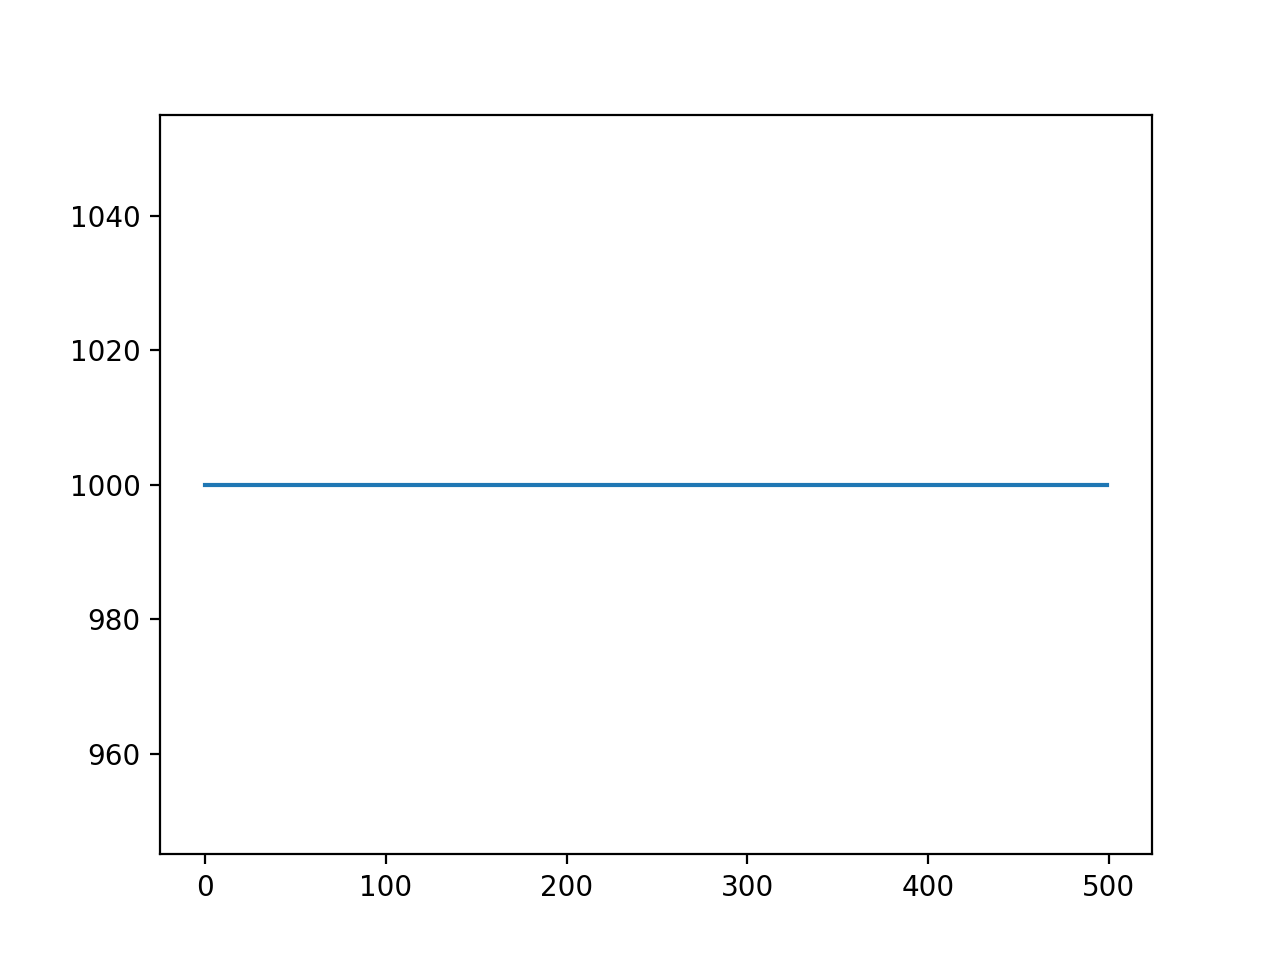

In [52]:
#Main program
c = Const();
np.random.seed(1)
curve  = model(c, show_dotses=True);
plt.figure();
plt.plot(curve);